# COSC 2779 Deep learning: Assignment 2


In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

%cd /content/gdrive/My Drive/StanceDataset/

# Check current OS directory
!ls

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/StanceDataset
glove.twitter.100d.preloaded.txt  glove.twitter.27B.200d.txt
glove.twitter.200d.preloaded.txt  glove.twitter.27B.25d.txt
glove.twitter.25d.preloaded.txt   test.csv
GloVe_Twitter_25d.txt		  train.csv
glove.twitter.27B.100d.txt	  train_shuffled.csv


## Data Exploration & Analysis



### Data Retrieval

In [2]:
# Import Essential dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import tensorflow as tf

In [3]:
!pip install nltk

import nltk



In [4]:
# Read train and test dataset.
with open('train.csv','r',encoding='ISO-8859-1') as f:
    train_data = pd.read_csv(f)

with open('test.csv','r',encoding='ISO-8859-1') as y:
    test_data = pd.read_csv(y)
    
    
f.close()
y.close()

In [5]:
train_data.head(20)

Tweet  ... Sentiment
0   @tedcruz And, #HandOverTheServer she wiped cle...  ...       neg
1   Hillary is our best choice if we truly want to...  ...       pos
2   @TheView I think our country is ready for a fe...  ...       neg
3   I just gave an unhealthy amount of my hard-ear...  ...       neg
4   @PortiaABoulger Thank you for adding me to you...  ...       pos
5   Hillary can not win. Here's hoping the Dems of...  ...       neg
6   Respect FOR the law and respect BY the law Yes...  ...       pos
7   I don't want to be appointed to an Ambassador ...  ...       neg
8   #StopHillary2016 @HillaryClinton if there was ...  ...       neg
9   @HillaryClinton End lawless #ClintonFoundation...  ...       neg
10  Use your brain, keep Hillary out of the White ...  ...       neg
11  @HillaryClinton Hillary pandering with her log...  ...       neg
12  @readyforHRC @HillaryClinton #HillaryClinton, ...  ...       pos
13     @CiaraAntaya cuz you know I'm such a feminist   ...     other
14  2 million bogus followers on Twitter @HillaryC...  ...       neg
15  @lindasuhler : My name is Rebecca and my grand...  ...       pos
16  Where's the campaign store is the real questio...  ...       pos
17  It's a miracle, suddenly #Democrats don't mind...  ...       neg
18  @smileitsalicia @greekgummybear2 now i can liv...  ...       pos
19  Hillary doesn't want to put anyone in prison a...  ...       neg

[20 rows x 5 columns]

In [6]:
test_data.head(20)
    

Tweet  ... Sentiment
0   He who exalts himself shall      be humbled; a...  ...       pos
1   RT @prayerbullets: I remove Nehushtan -previou...  ...     other
2   @Brainman365 @heidtjj @BenjaminLives I have so...  ...       pos
3   #God is utterly powerless without Human interv...  ...       neg
4   @David_Cameron   Miracles of #Multiculturalism...  ...       neg
5   This world needs a tight group hug. Tight enou...  ...       pos
6   Morality is not derived from religion, it prec...  ...       pos
7   A Godly husband  - knows you - trusts you - lo...  ...       pos
8   @SecularDutchess I'll be your huckleberry @Dea...  ...     other
9   #BIBLE = Big Irrelevant Book of Lies and Exagg...  ...       neg
10  If only dreams were real, now it's gone. #Sing...  ...       neg
11  Happy Independence Day to America and her beau...  ...       pos
12  Let my house be built by wisdom and become str...  ...       pos
13  These days, the cool kids are atheists.  #free...  ...       pos
14  Next time you hear someone say that our Foundi...  ...       neg
15  #ILoveIslamBecause and v should love Islam bec...  ...       pos
16  Be a sinner and sin strongly, but more strongl...  ...       pos
17  #God > My fears God > My insecurities God > My...  ...       pos
18  Mary, Queen of martyrs, pray for us. #Catholic...  ...       pos
19  America, like all of us, has both beauty and b...  ...       neg

[20 rows x 5 columns]

In [7]:
train_data['Tweet']

0       @tedcruz And, #HandOverTheServer she wiped cle...
1       Hillary is our best choice if we truly want to...
2       @TheView I think our country is ready for a fe...
3       I just gave an unhealthy amount of my hard-ear...
4       @PortiaABoulger Thank you for adding me to you...
                              ...                        
2909    There's a law protecting unborn eagles, but no...
2910    I am 1 in 3... I have had an abortion #Abortio...
2911    How dare you say my sexual preference is a cho...
2912    Equal rights for those 'born that way', no rig...
2913    #POTUS seals his legacy w/ 1/2 doz wins. The #...
Name: Tweet, Length: 2914, dtype: object

In [8]:

# Number of Stance
train_data['Stance'].unique()


array(['AGAINST', 'FAVOR', 'NONE'], dtype=object)

In [9]:

# Number of Target Topic
train_data['Target'].unique()

array(['Hillary Clinton', 'Legalization of Abortion', 'Atheism',
       'Climate Change is a Real Concern', 'Feminist Movement'],
      dtype=object)

### Observe Stance Distribution for each target topic

In [10]:
import seaborn as sns

def plotTopicDist(TARGET_TOPIC):
  index = 0

  counter = [0,0,0]


  for topic in train_data['Target']:
    if topic == TARGET_TOPIC:
      y = 0
      for stance in train_data['Stance'].unique():
        if stance == train_data['Stance'][index]:
          counter[y] += 1
        y+=1


    index+=1

  df = pd.DataFrame([{'x':'AGAINST','y':counter[0]},{'x':'FAVOUR','y':counter[1]},{'x':'NONE','y':counter[2]}])
  sns.barplot(x = 'x',
              y = 'y',
              data = df)

  plt.title("TARGET TOPIC: "+str(TARGET_TOPIC))

  plt.show()

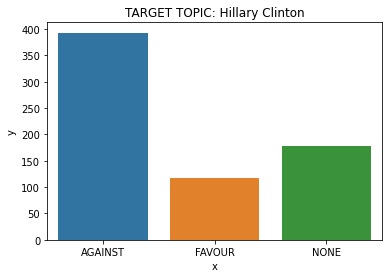

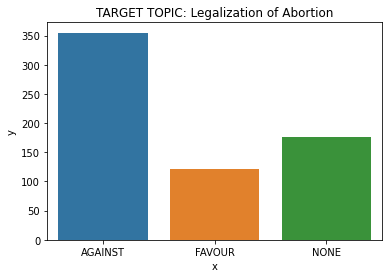

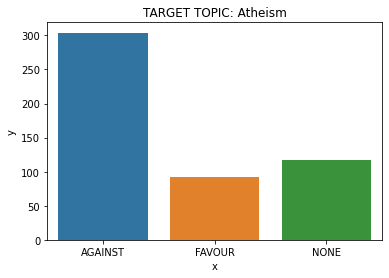

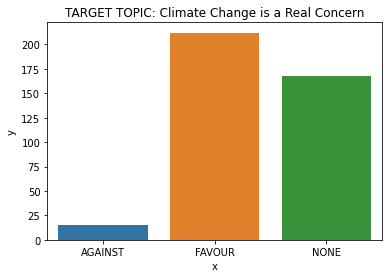

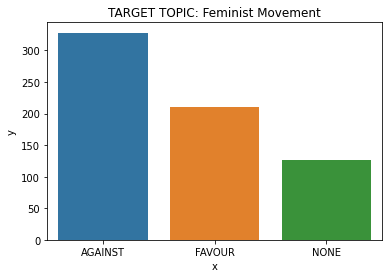

In [11]:
# Observe all target topic distributions
for topic in train_data['Target'].unique():
  plotTopicDist(topic)

### Visualizations of word distribution in Tweets


In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Word Cloud (Train Data)

In [13]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

def visualizeWordCloud(data):
  tweet_All = " ".join(review for review in data)

  plt.figure(figsize  = (30,30))
  # Create and generate a word cloud image:
  wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

  # Display the generated image:
  plt.imshow(wordcloud_ALL, interpolation='bilinear')
  plt.title('All Tweets', fontsize=30)
  plt.axis('off')


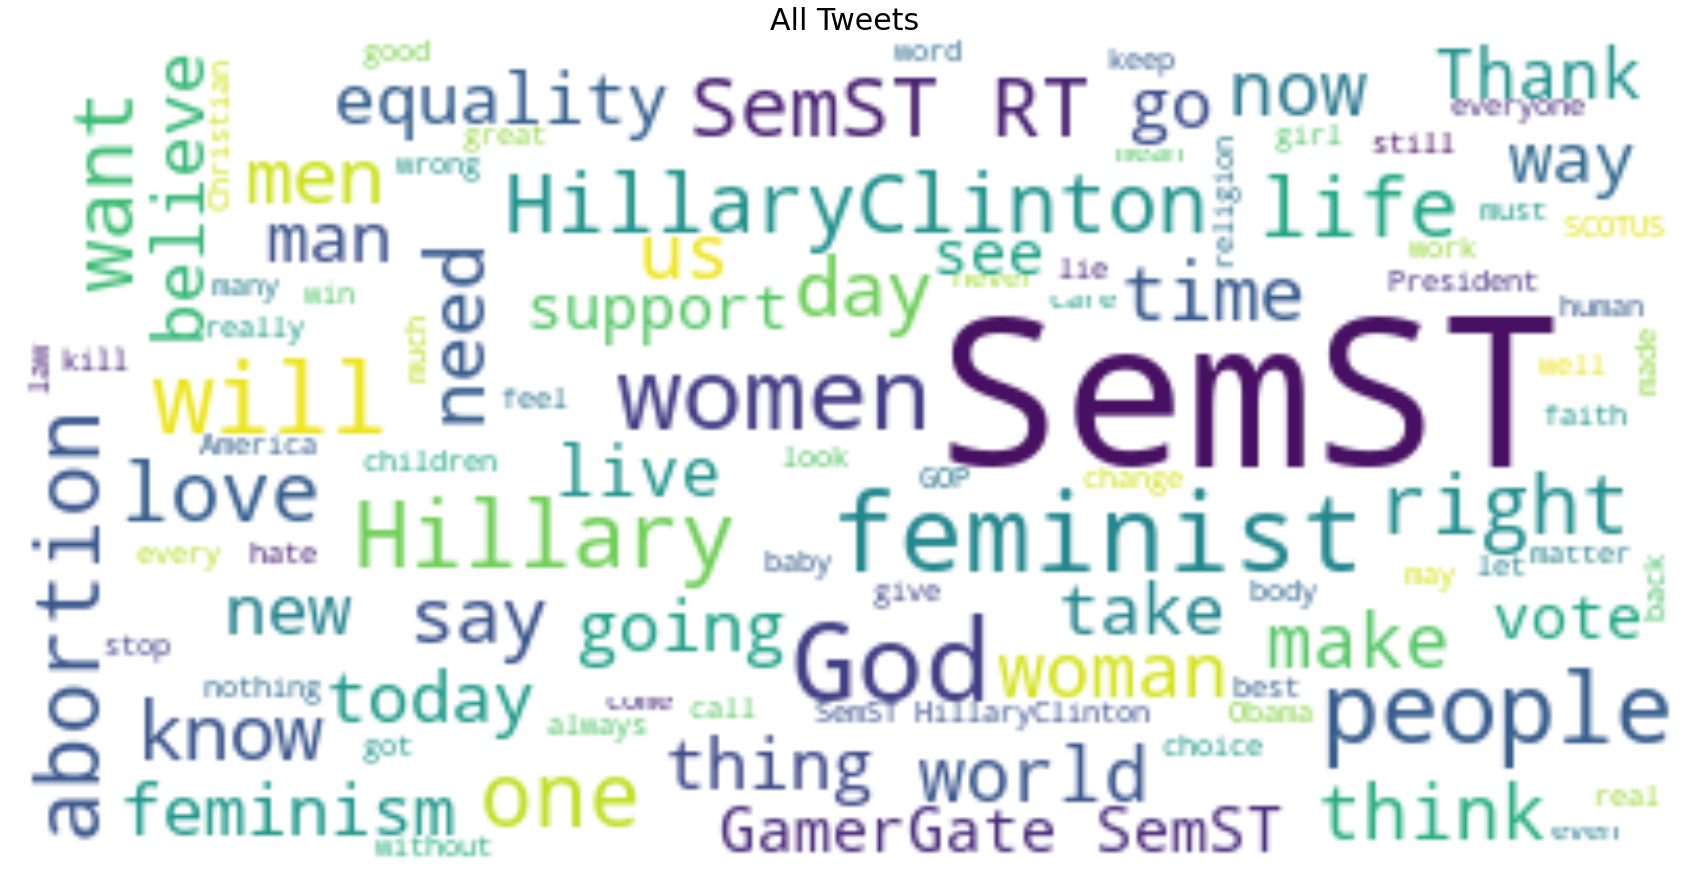

In [14]:
visualizeWordCloud(train_data['Tweet'])

### Word Cloud (Test Data)

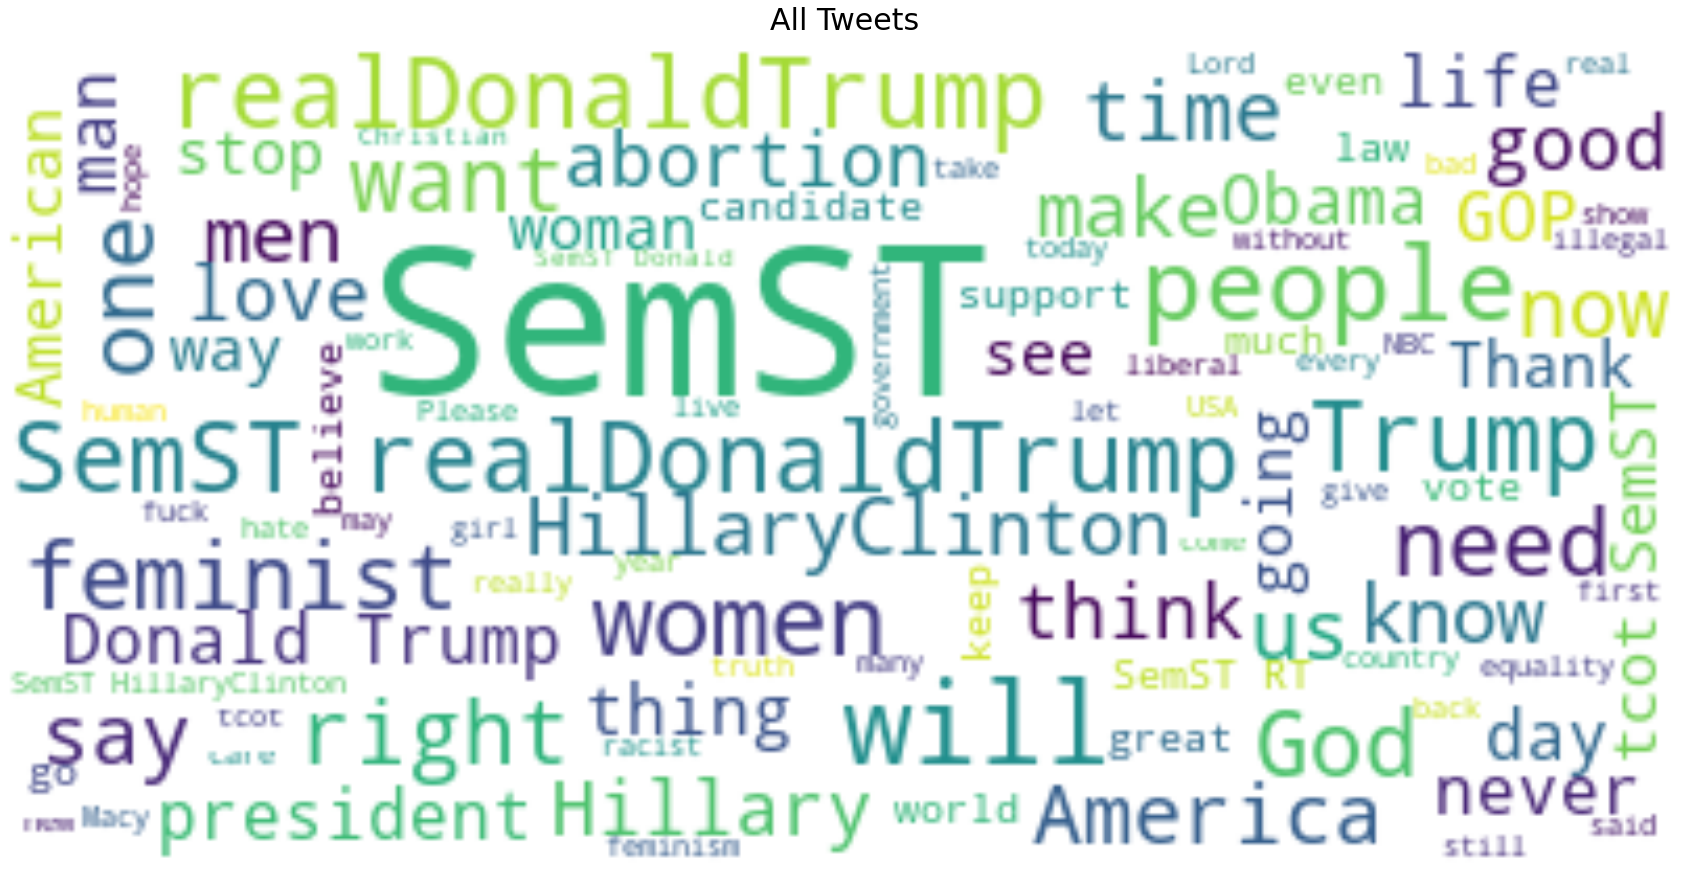

In [15]:
visualizeWordCloud(test_data['Tweet'])

### Topic Specific WordCloud

**Hillary Clinton**

In [16]:
def visualizeTopicWordCloud(TARGET_TOPIC):
  topicBool = train_data['Target'] == TARGET_TOPIC
  topic = train_data[topicBool]

  visualizeWordCloud(topic['Tweet'])

**Hillary Clinton**

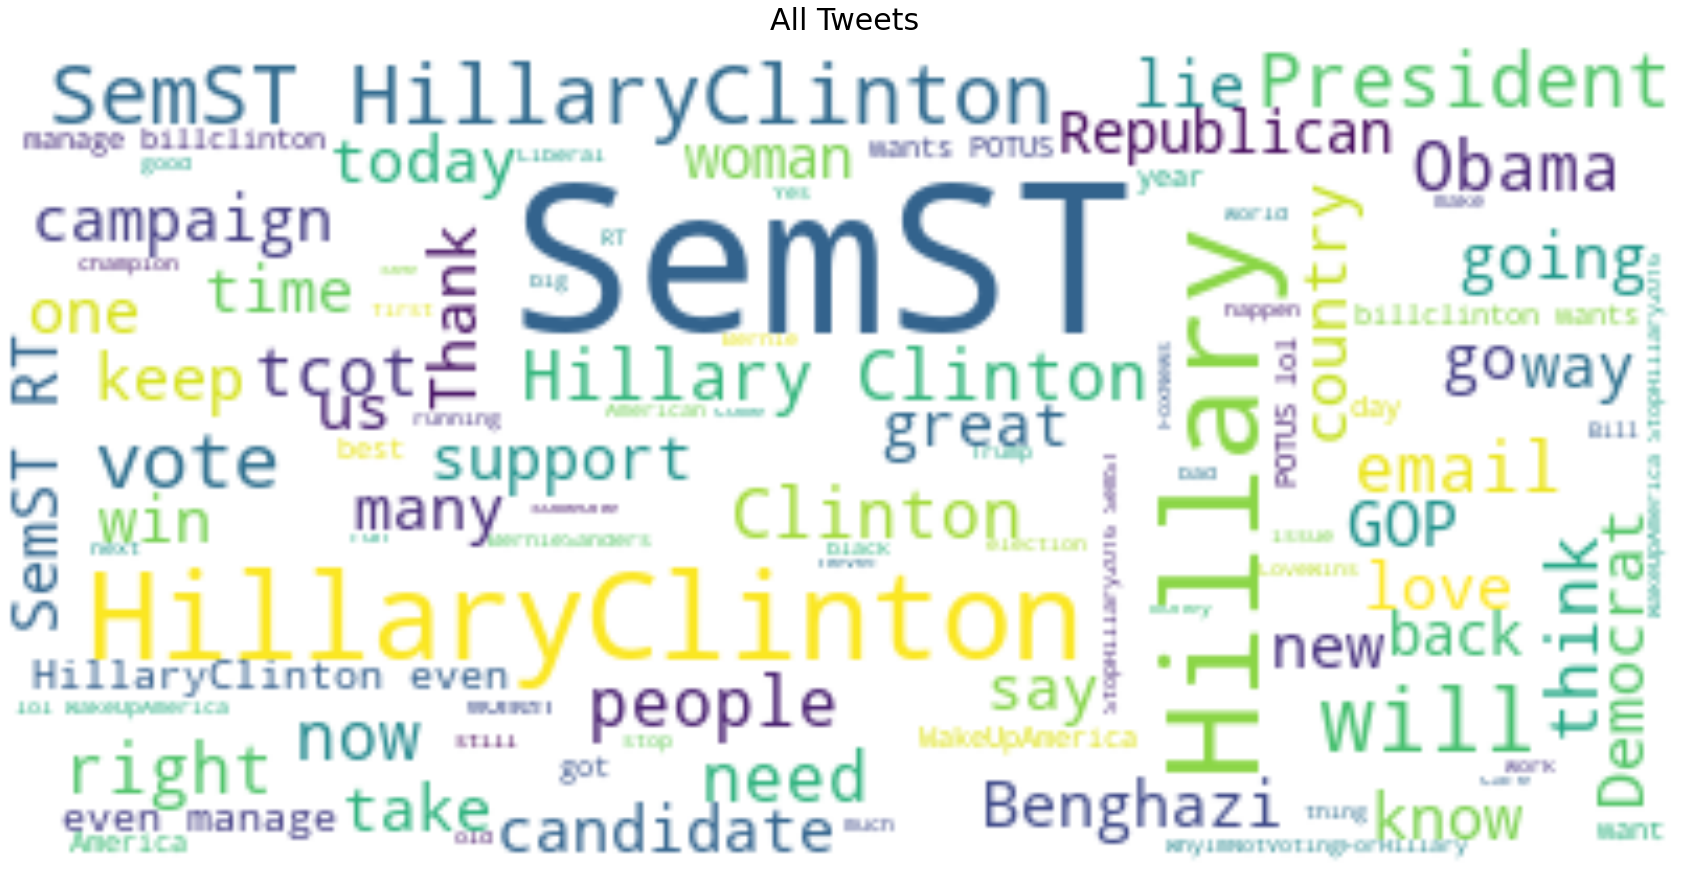

In [17]:
visualizeTopicWordCloud("Hillary Clinton")

**Legalization of Abortion**

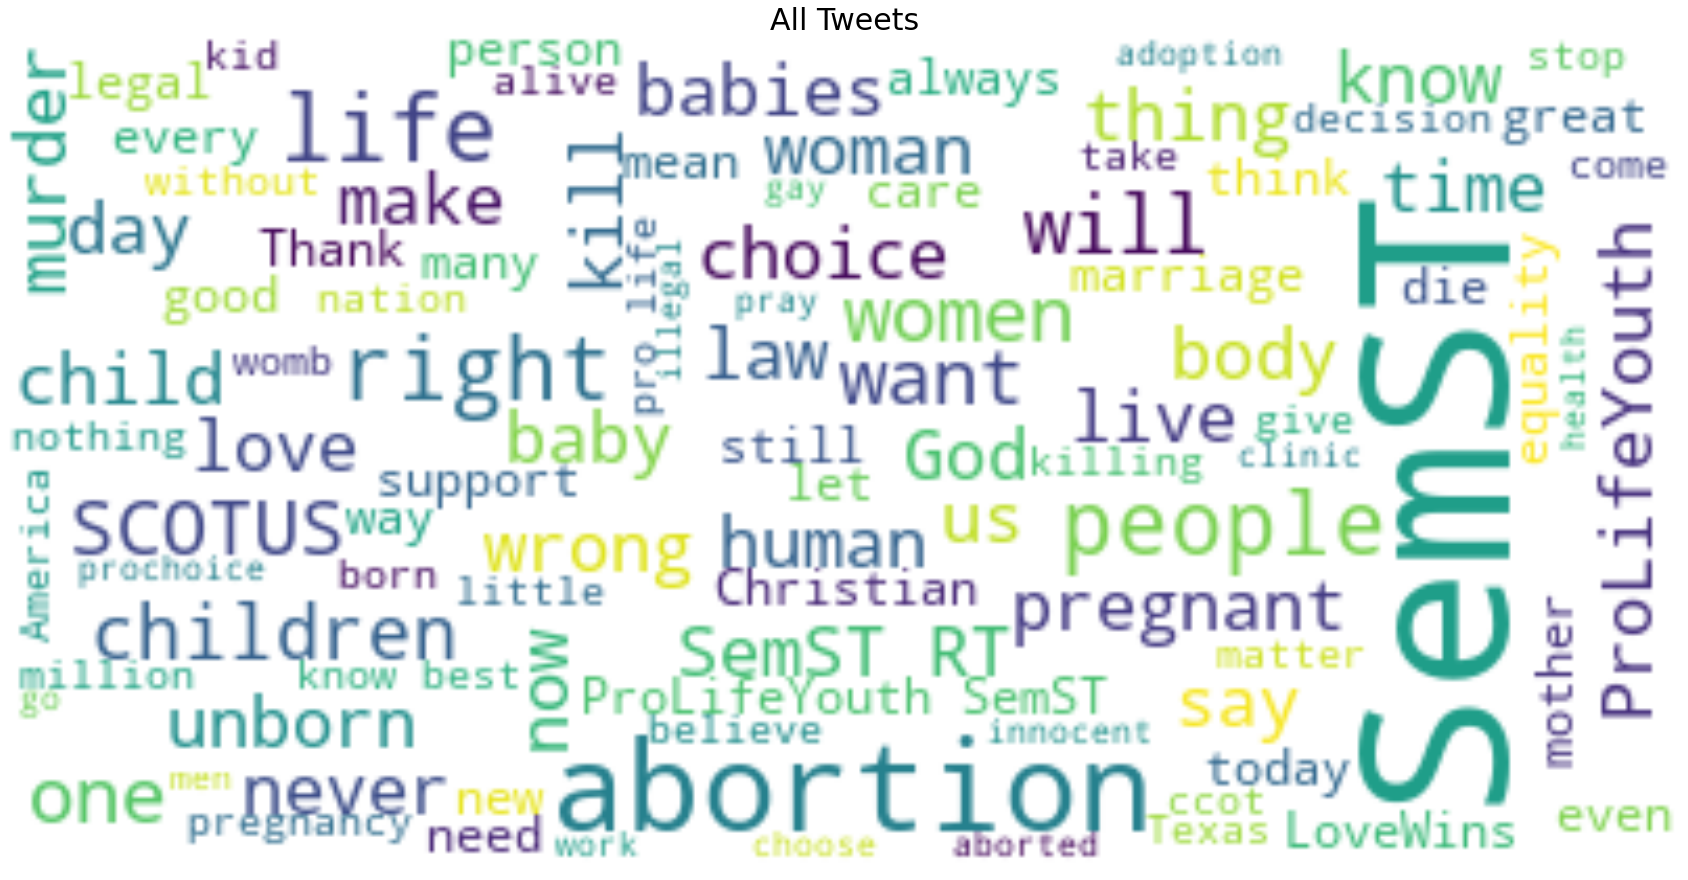

In [18]:
visualizeTopicWordCloud('Legalization of Abortion')

**Atheism**

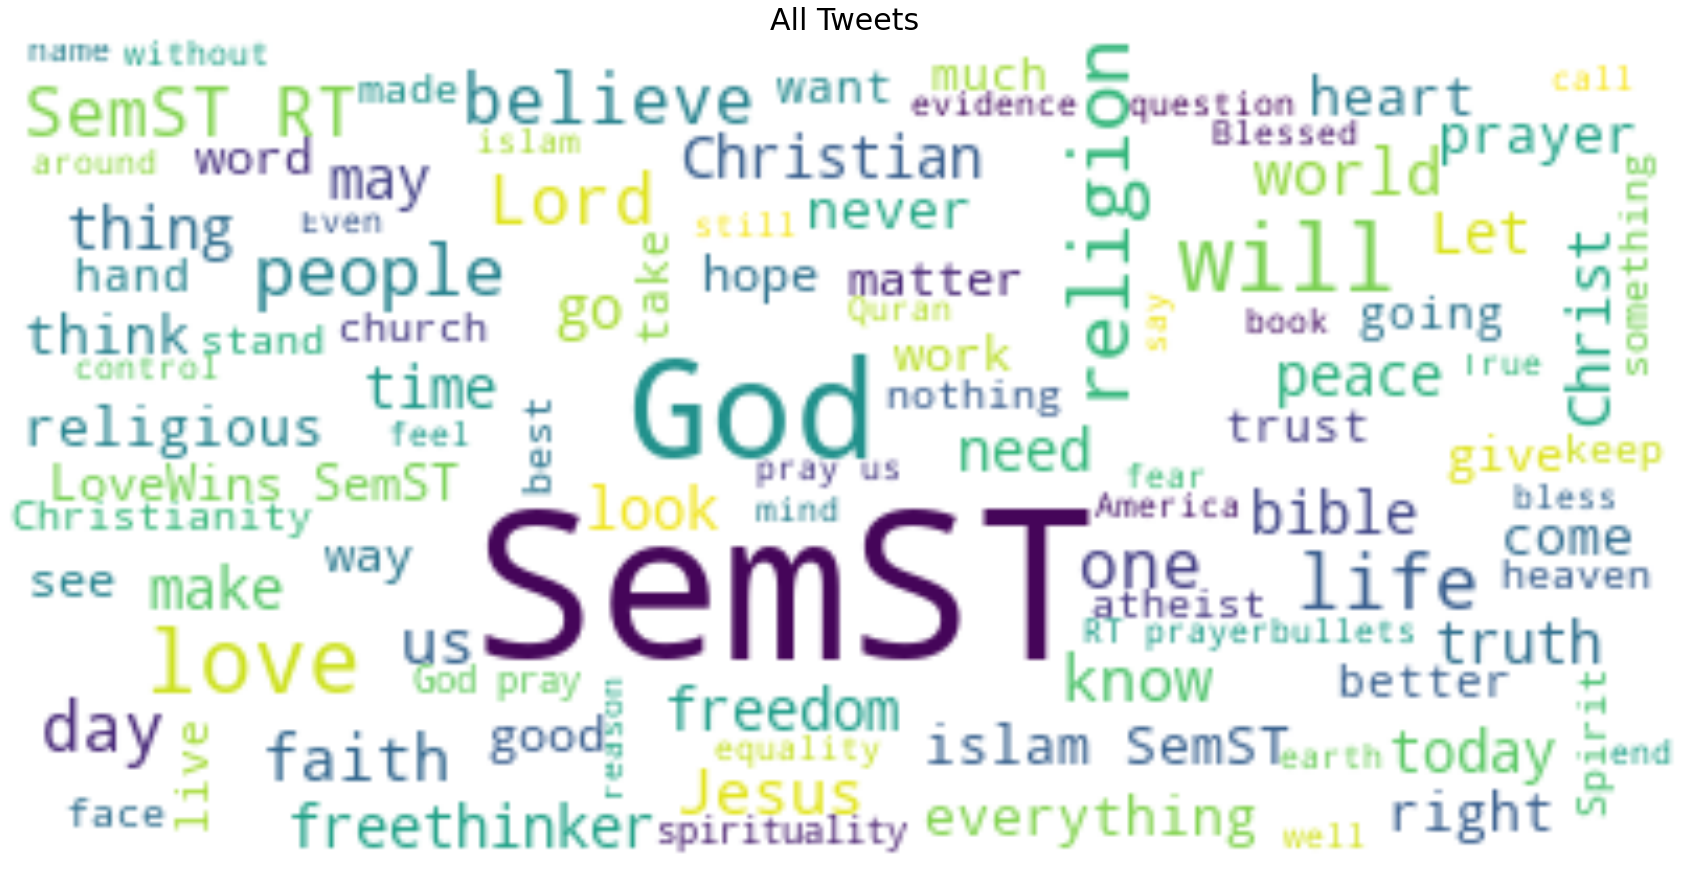

In [19]:
visualizeTopicWordCloud('Atheism')

**Climate Change is a Real Concern**

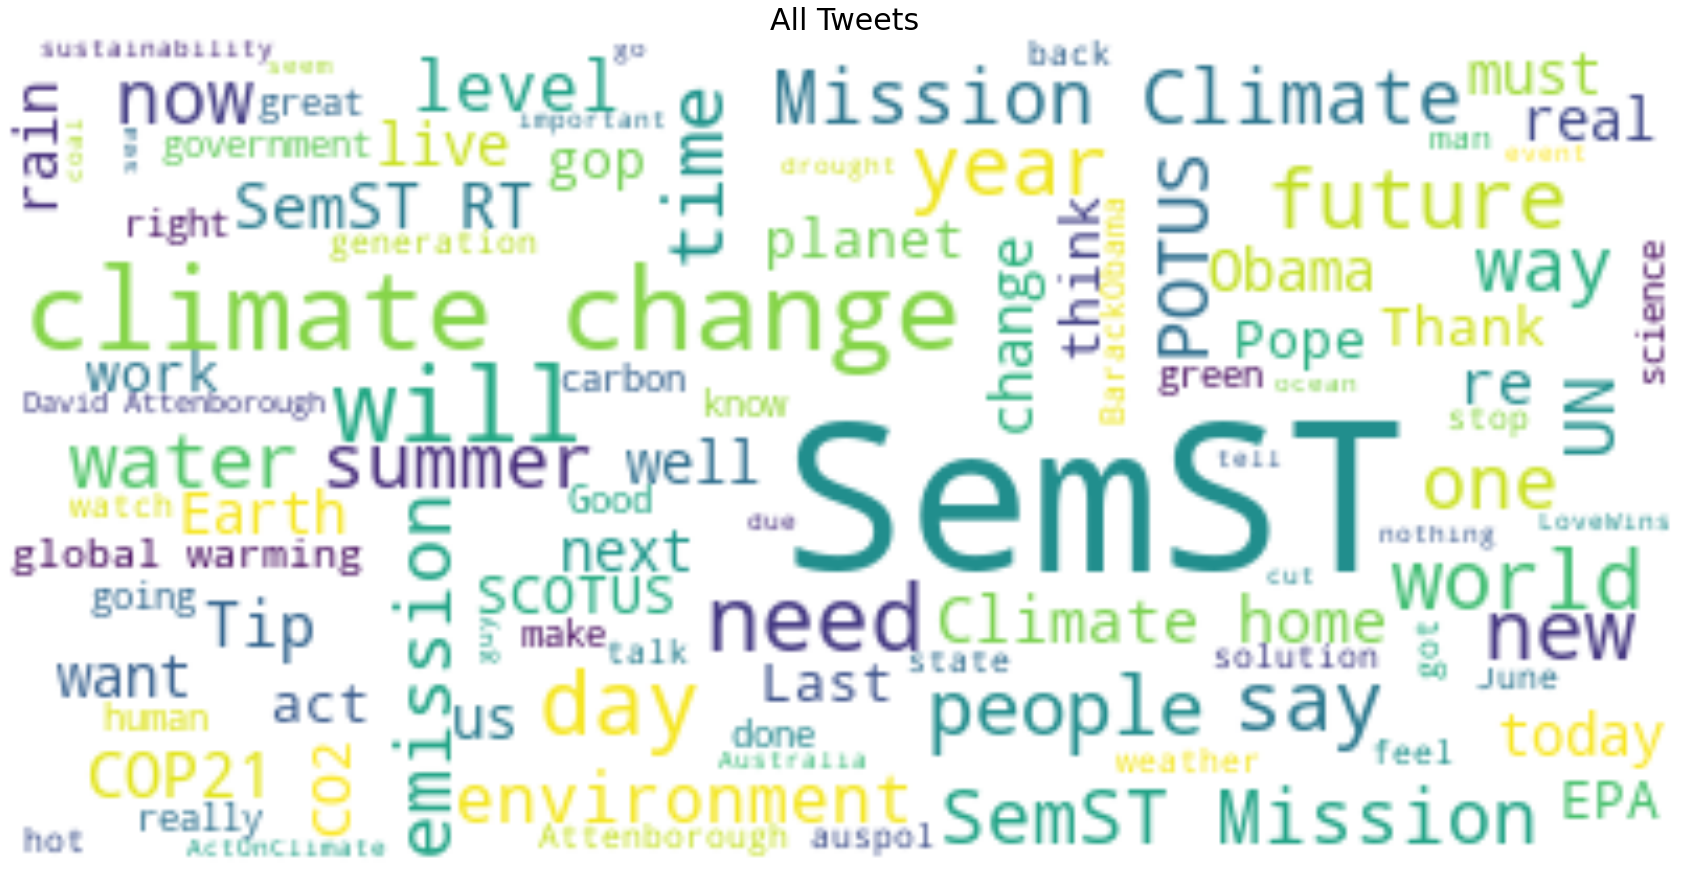

In [20]:
visualizeTopicWordCloud('Climate Change is a Real Concern')

**Feminist Movement**

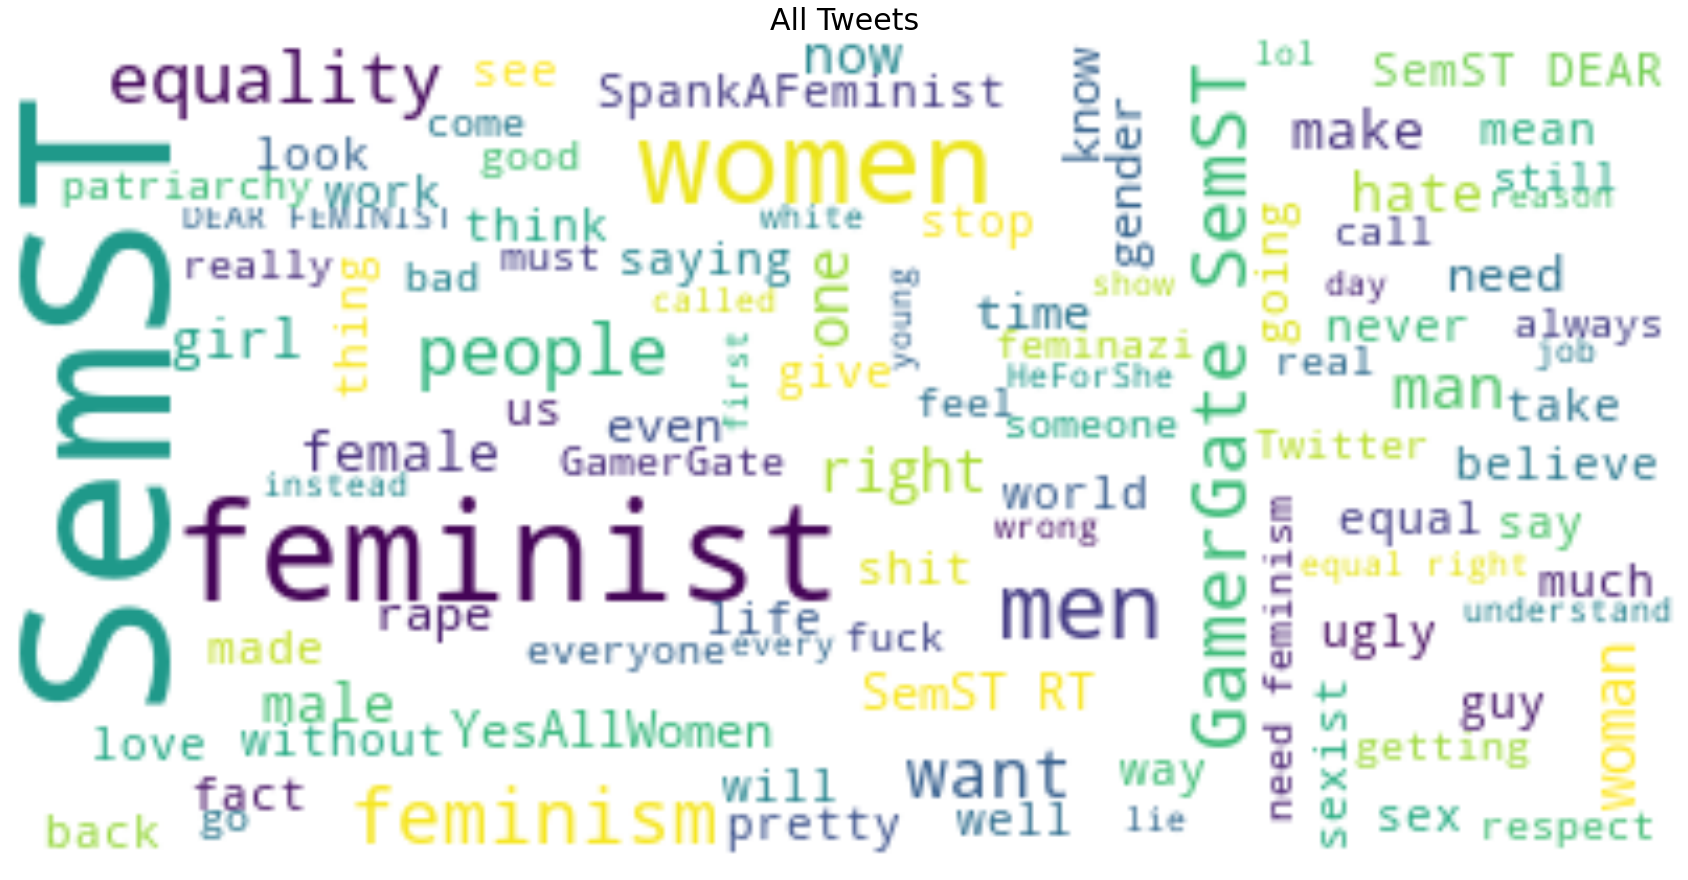

In [21]:
visualizeTopicWordCloud('Feminist Movement')

## Data Preparation

### Preparing Input & Target (x/y) values 

In [22]:
!pip install wordsegment

In [23]:
!pip install autocorrect

In [24]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from wordsegment import load, segment
load()
from autocorrect import Speller

spell = Speller(lang='en')
tweets = list()
target = list()
hashtag = list()

#extracting hashtag keywords from tweet
train_data['hashtag'] = train_data['Tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))

#extracting tagged users from tweet
train_data['users'] = train_data['Tweet'].apply(lambda x: re.findall(r'\B@\w*[a-zA-Z]+\w*', x))


lines_tweet = train_data["Tweet"].values.tolist()
lines_target = train_data["Target"].values.tolist()

for line in lines_tweet:


     
    #remove puntuations
    
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())

    #line = ' '.join(segment(line))
    #line = ' '.join([spell(w) for w in line.split()])
    # tokenize the text
    tokens = word_tokenize(line)

    # convert to lower case
    tokens = [w.lower() for w in tokens]


    tweets.append(tokens)


for line in lines_target:
    
    tokens = word_tokenize(line)

    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    target.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
lines_hashtag = train_data["hashtag"].values.tolist()


for line in lines_hashtag:
  line = ' '.join(line)
  line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
  line = ' '.join(segment(line))
  tokens = word_tokenize(line)

    # convert to lower case
  tokens = [w.lower() for w in tokens]
    
  hashtag.append(tokens)

In [26]:
# Max length for tweet sentences.
len(max(tweets,key = len))

33

In [27]:
# Max length for target sentences.
len(max(target,key = len))

6

In [28]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

validation_split = 0.20
max_length_tweet = len(max(tweets,key = len))
max_length_target = len(max(target,key = len))

#max_length_hashtag = len(max(hashtag,key = len))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
#tokenizer.fit_on_texts(target)
#tokenizer.fit_on_texts(hashtag)


sequences_tweets = tokenizer.texts_to_sequences(tweets)
sequences_target = tokenizer.texts_to_sequences(target)

#sequences_hashtag = tokenizer.texts_to_sequences(hashtag)


word_index= tokenizer.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size= len(tokenizer.word_index) + 1
print('vocab_size - '+str(vocab_size))

lines_pad_tweets = pad_sequences(sequences_tweets, maxlen=max_length_tweet, padding='post')
lines_pad_target = pad_sequences(sequences_target, maxlen=max_length_target, padding='post')
#lines_pad_hashtag = pad_sequences(sequences_hashtag, maxlen=max_length_hashtag, padding='post')


encode = {
    "AGAINST" : 0,
    "NONE"  : 1,       
    "FAVOR" : 2
}

train_data["Stance"] = train_data["Stance"].apply(lambda x: encode[x])

category = train_data['Stance'].values

unique tokens - 9244
vocab_size - 9245


In [29]:
print(category)

[0 2 0 ... 0 0 0]


In [30]:
indices = np.arange(lines_pad_tweets.shape[0])
np.random.shuffle(indices)
lines_pad_tweets = lines_pad_tweets[indices]
lines_pad_target = lines_pad_target[indices]
#lines_pad_hashtag = lines_pad_hashtag[indices]
category = category[indices]

n_values = np.max(category) + 1
Y = np.eye(n_values)[category]

num_validation_samples = int(validation_split * lines_pad_tweets.shape[0])

X_train_tweets_pad = lines_pad_tweets[:-num_validation_samples]
X_train_target_pad = lines_pad_target[:-num_validation_samples]
#X_train_hashtag_pad = lines_pad_hashtag[:-num_validation_samples]
y_train = Y[:-num_validation_samples]
X_val_tweets_pad = lines_pad_tweets[-num_validation_samples:]
X_val_target_pad = lines_pad_target[-num_validation_samples:]
#X_val_hashtag_pad = lines_pad_hashtag[-num_validation_samples:]
y_val = Y[-num_validation_samples:]

In [31]:
print('Shape of X_train_tweet_pad:', X_train_tweets_pad.shape)
print('Shape of X_train_target_pad:', X_train_target_pad.shape)
#print('Shape of X_train_hashtag_pad:', X_train_hashtag_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_tweet_pad:', X_val_tweets_pad.shape)
print('Shape of X_test_target_pad:', X_val_target_pad.shape)
#print('Shape of X_test_hashtag_pad:', X_val_hashtag_pad.shape)
print('Shape of y_test:', y_val.shape)

Shape of X_train_tweet_pad: (2332, 33)
Shape of X_train_target_pad: (2332, 6)
Shape of y_train: (2332, 3)
Shape of X_test_tweet_pad: (582, 33)
Shape of X_test_target_pad: (582, 6)
Shape of y_test: (582, 3)


In [32]:
X_train_tweets_pad

array([[1012,    8, 2980, ...,    0,    0,    0],
       [1395, 3255,  761, ...,    0,    0,    0],
       [2757,   82,  217, ...,    0,    0,    0],
       ...,
       [ 608, 3375,  123, ...,    0,    0,    0],
       [   2,  333,   23, ...,    0,    0,    0],
       [7032,   25,   36, ...,    0,    0,    0]], dtype=int32)

In [33]:
X_val_target_pad

array([[7616,    5,   61,    0,    0,    0],
       [  75, 1013,    0,    0,    0,    0],
       [  41,  136,    0,    0,    0,    0],
       ...,
       [  41,  136,    0,    0,    0,    0],
       [  41,  136,    0,    0,    0,    0],
       [7616,    5,   61,    0,    0,    0]], dtype=int32)

### Preparing Test Dataset

In [34]:
# Removing Donald Trump Target Topic
test_data = test_data[test_data['Target'] != "Donald Trump"]

In [35]:
spell = Speller(lang='en')
test_tweets = list()
test_target = list()
test_hashtag = list()

#extracting hashtag keywords from tweet
test_data['hashtag'] = test_data['Tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))

#extracting tagged users from tweet
test_data['users'] = test_data['Tweet'].apply(lambda x: re.findall(r'\B@\w*[a-zA-Z]+\w*', x))


lines_tweet = test_data["Tweet"].values.tolist()
lines_target = test_data["Target"].values.tolist()

for line in lines_tweet:
    #remove puntuations
    
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)

    # convert to lower case
    tokens = [w.lower() for w in tokens]

    test_tweets.append(tokens)


for line in lines_target:
    
    tokens = word_tokenize(line)

    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    test_target.append(tokens)

In [36]:
test_lines_hashtag = test_data["hashtag"].values.tolist()


for line in test_lines_hashtag:
  line = ' '.join(line)
  line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
  line = ' '.join(segment(line))
  tokens = word_tokenize(line)

    # convert to lower case
  tokens = [w.lower() for w in tokens]
    
  test_hashtag.append(tokens)

In [37]:
test_sequences_tweets = tokenizer.texts_to_sequences(test_tweets)
test_sequences_target = tokenizer.texts_to_sequences(test_target)
#test_sequences_hashtag = tokenizer.texts_to_sequences(test_hashtag)

test_lines_pad_tweets = pad_sequences(test_sequences_tweets, maxlen=max_length_tweet, padding='post')
test_lines_pad_target = pad_sequences(test_sequences_target, maxlen=max_length_target, padding='post')
#test_lines_pad_hashtag = pad_sequences(test_sequences_hashtag, maxlen=max_length_hashtag, padding='post')


encode = {
    "AGAINST" : 0,
    "NONE"  : 1,       
    "FAVOR" : 2
}

test_data["Stance"] = test_data["Stance"].apply(lambda x: encode[x])

category = test_data['Stance'].values

In [38]:
print("Test Tweets Shape", test_lines_pad_tweets.shape)
print("Test Targets Shape",test_lines_pad_target.shape)
print("Test Stance Shape",test_data['Stance'].shape)

Test Tweets Shape (1249, 33)
Test Targets Shape (1249, 6)
Test Stance Shape (1249,)


In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
    
def getTestAccuracy(model):
    y_pred = model.predict([ test_lines_pad_tweets, test_lines_pad_target])
    
    y_pred_max = np.argmax(y_pred, axis=1)
    
    return str("{:.2f}".format(accuracy_score(test_data['Stance'], y_pred_max) * 100))+"%"

In [98]:
def getF1ScoreMacro(model):
    y_pred = model.predict([ test_lines_pad_tweets, test_lines_pad_target])
    
    y_pred_max = np.argmax(y_pred, axis=1)

    return str("{:.2f}".format(f1_score(test_data['Stance'], y_pred_max, average="macro")* 100))+"%"

In [91]:
def getF1ScoreMicro(model):
    y_pred = model.predict([ test_lines_pad_tweets, test_lines_pad_target])
    
    y_pred_max = np.argmax(y_pred, axis=1)

    return str("{:.2f}".format(f1_score(test_data['Stance'], y_pred_max, average="micro")* 100))+"%"

In [92]:
def getF1ScoreAverage(model):
    y_pred = model.predict([ test_lines_pad_tweets, test_lines_pad_target])
    
    y_pred_max = np.argmax(y_pred, axis=1)

    return str("{:.2f}".format(((f1_score(test_data['Stance'], y_pred_max, average="macro")+f1_score(test_data['Stance'], y_pred_max, average="micro"))/2)* 100))+"%"

In [194]:
def getPerformanceReport(model):

    performance = []

    y_pred = model.predict([test_lines_pad_tweets, test_lines_pad_target])
    
    y_pred_max = np.argmax(y_pred, axis=1)

    f1_macro = str("{:.2f}".format(f1_score(test_data['Stance'], y_pred_max, average="macro")* 100))+"%"
    f1_micro = str("{:.2f}".format(f1_score(test_data['Stance'], y_pred_max, average="micro")* 100))+"%"
    f1_average = str("{:.2f}".format(((f1_score(test_data['Stance'], y_pred_max, average="macro")+f1_score(test_data['Stance'], y_pred_max, average="micro"))/2)* 100))+"%"

    performance.append({"Target": "All", "F1-Micro": f1_micro, "F1-Macro": f1_macro, "F1-Average":f1_average})
    for target in test_data["Target"].unique():
      index = 0

      y_test_target = []
      y_pred_target = []
      
      for test_target in test_data['Target']:
        if target == test_target:
          y_test_target.append(test_data["Stance"][index])
          y_pred_target.append(y_pred_max[index])

        index+=1

      f1_macro = str("{:.2f}".format(f1_score(y_test_target, y_pred_target, average="macro")* 100))+"%"
      f1_micro = str("{:.2f}".format(f1_score(y_test_target, y_pred_target, average="micro")* 100))+"%"
      f1_average = str("{:.2f}".format(((f1_score(y_test_target, y_pred_target, average="macro")+f1_score(y_test_target, y_pred_target, average="micro"))/2)* 100))+"%"

      performance.append({"Target": target, "F1-Micro": f1_micro, "F1-Macro": f1_macro, "F1-Average":f1_average})

    return pd.DataFrame(performance)


In [41]:
import seaborn as sns 

def getPredictionBarPlot(model, target):
  y_pred = model.predict([ test_lines_pad_tweets, test_lines_pad_target])
    
  y_pred_max = np.argmax(y_pred, axis=1)

  index = 0
  rows_list = []

  counter = [0,0,0,0,0,0]

  for val in test_data["Target"]:
    if val == target:
      if y_pred_max[index] == 0:
        counter[0]+= 1
      elif y_pred_max[index] == 1:
        counter[1] += 1
      elif y_pred_max[index] == 2:
        counter[2] += 1
        
      if test_data['Stance'][index] == 0:
        counter[3] += 1
      elif test_data['Stance'][index] == 1:
        counter[4] += 1
      elif test_data['Stance'][index] == 2:
        counter[5] += 1
  
    index += 1

  rows_list.append({"type": "actual", "class": "favor", "count": counter[0]})
  rows_list.append({"type": "actual", "class": "neutral", "count": counter[1]})
  rows_list.append({"type": "actual", "class": "against", "count": counter[2]})
  rows_list.append({"type": "predicted", "class": "favor", "count": counter[3]})
  rows_list.append({"type": "predicted", "class": "neutral", "count": counter[4]})
  rows_list.append({"type": "predicted", "class": "against", "count": counter[5]})

  stats_df = pd.DataFrame(rows_list)  

  sns.barplot(x="class", y="count", hue="type", data=stats_df)
  plt.ylabel("Count", size=14)
  plt.xlabel("Class", size=14)
  plt.title("Predicted vs Actual: " + target, size=18)

### Importing GloVe Twitter Embedding Vector

In [42]:
# Check file directory.
!ls

glove.twitter.100d.preloaded.txt  glove.twitter.27B.200d.txt
glove.twitter.200d.preloaded.txt  glove.twitter.27B.25d.txt
glove.twitter.25d.preloaded.txt   test.csv
GloVe_Twitter_25d.txt		  train.csv
glove.twitter.27B.100d.txt	  train_shuffled.csv


In [43]:
# Import GloVe word embeddings train on text corpus of 27 billion tweets.
file = open('glove.twitter.27B.200d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()

In [44]:
# Initialze embedding dim.
embedding_dim = 200

In [45]:
# Map GloVe emebddings to current vocabulary
E_T_200d= np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T_200d[i] = embedding_vector

In [46]:
# Delete Vector dictionary to save memory on instance.
del glove_vectors

In [47]:
# Check Embedding Vector Shape
print("200d vector shape:", E_T_200d.shape)

200d vector shape: (9245, 200)


### Prepare Visualization Tools

In [48]:
from itertools import cycle

# Compare plots for different models.
def plotter(history_hold, metric = 'loss', ylim=[0.0, 1.0]):
  cycol = cycle('bgrcmk')
  for name, item in history_hold.items():
    y_train = item.history[metric]
    y_val = item.history['val_' + metric]
    x_train = np.arange(0,len(y_val))

    c=next(cycol)

    plt.plot(x_train, y_train, c+'-', label=name+'_train')
    plt.plot(x_train, y_val, c+'--', label=name+'_val')

  plt.legend()
  plt.xlim([1, max(plt.xlim())])
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.grid(True)

In [49]:
# plot the evolution of Loss and Acuracy on the train and validation sets
import matplotlib.pyplot as plt

def plotter_single(history):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

In [50]:
# Compare training and val loss or accuracy on last epoch.
def compare_params(metric="loss", h_histories= {}, params_list=[], param_name="Lambda", model_name="model_"):
  plt.figure(figsize=(10,5))
  l_train = list()
  l_val = list()

  for param in params_list:
    l_train.append(h_histories[model_name+ '_h' + str(param)].history[metric][-1])
    l_val.append(h_histories[model_name+ '_h' + str(param)].history['val_' + metric][-1])

  plt.plot(params_list,l_train, 'ro', label='Train' )
  plt.plot(params_list,l_val, 'bs', label='Test' )

  plt.xlabel(param_name, fontsize=14)
  plt.ylabel(metric, fontsize=14)
  plt.legend()
  plt.show()

## Selected Model Architecture

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional,Input, Multiply, Concatenate

from tensorflow.keras import regularizers
from tensorflow.keras import Model
from tensorflow.keras import optimizers

from tensorflow.keras.models import Sequential

import tensorflow.keras.backend as K

from tensorflow.keras import initializers
from tensorflow.keras.layers import BatchNormalization

Attention layer source: https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/

In [52]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [53]:
def optimizer_adam(dec_rate = 30,lr = 0.001, xtrain = None, batch_size = 32):
  STEPS_PER_EPOCH = xtrain.shape[0]
  lr_adam = lr

  lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  lr_adam,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=dec_rate,
  staircase=False)
  opt_adam = optimizers.Adam(learning_rate=lr_schedule)
  return opt_adam

In [54]:
def model_conditional_encoding(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.0025, learning_rate=0.0004, batch_size = 32, E_T= E_T_200d):
  ##########################
  # Model Inputs
  ##########################

  # define three sets of inputs (Tweets, Target Topic, Hashtag)
  input_tweets = Input(shape=(X_train_tweets_pad.shape[1],))
  input_target = Input(shape=(X_train_target_pad.shape[1],))

  input_tweet_length = X_train_tweets_pad.shape[1]
  input_target_length = X_train_target_pad.shape[1]

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=vocab_size,
                      input_length=max_length_target,
                      weights=[E_T],
                      trainable=False)(input_target)


  x = Dropout(dropout_rate)(x)


  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # Second Branch (Tweet)
  # Initalize Second Branch with First Branch encoding.
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=vocab_size,
                      input_length=max_length_tweet,
                      weights=[E_T],
                      trainable=False)(input_tweets)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  tweet_encoder_out = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  attention_out = attention()(tweet_encoder_out) 


  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.


  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out)

  z = Dropout(dropout_rate)(z)

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)

  z = BatchNormalization()(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[input_tweets,input_target], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  #lr = learning_rate
  optimizer = optimizer_adam(lr=learning_rate, xtrain=X_train_tweets_pad, batch_size = batch_size )
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [67]:
def model_conditional_encoding(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.0025, E_T=E_T_200d, learning_rate=0.0002, batch_size = 32):
  ##########################
  # Model Inputs
  ##########################

  # define three sets of inputs (Tweets, Target Topic, Hashtag)
  input_tweets = Input(shape=(X_train_tweets_pad.shape[1],))
  input_target = Input(shape=(X_train_target_pad.shape[1],))

  input_tweet_length = X_train_tweets_pad.shape[1]
  input_target_length = X_train_target_pad.shape[1]

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(input_target)

  x = Dropout(dropout_rate)(x)

  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # Second Branch (Tweet)
  # Initalize Second Branch with First Branch encoding.
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(input_tweets)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  tweet_encoder_out = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  attention_out = attention()(tweet_encoder_out)
  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out)

  z = Dropout(dropout_rate)(z)

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)

  z = BatchNormalization()(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[input_tweets,input_target], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  #lr = learning_rate
  optimizer = optimizer_adam(lr=learning_rate, xtrain=X_train_tweets_pad, batch_size = batch_size )
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

## Hyperparameter Search

In this section, a grid search approach will be used to find the most optimal hyperparameters for the best model architecture designed in this notebook:

The hyperparameters that will be searched are (in order of importance):


*   Learning Rate (alpha)
*   Dropout Rate
*   L2 Regularization (lambda)
*   Batch Size



### Learning Rate

In [ ]:
h_alpha_histories = {}

# Learning Rate Values (Previously determined desired range).
alpha_vals = [0.001, 0.0004, 0.0002, 0.0001]

# Perform grid search.
for val in alpha_vals:

  # Define Fitting Parameters
  VAL_SPLIT = 0.2
  MAX_EPOCHS = 80
  BATCH_SIZE = 32
  VERBOSE = 1
  SHUFFLE = True

  # Define model
  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = val, batch_size=BATCH_SIZE)

  

  h_alpha_histories['model_ce_alpha'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

In [ ]:
plotter(h_alpha_histories, ylim=[0.5,3])

In [ ]:
plotter(h_alpha_histories, metric="accuracy", ylim=[0.4,0.8])

In [ ]:
compare_params(params_list=alpha_vals,h_histories=h_alpha_histories, param_name="Alpha", model_name="model_ce_alpha")

In [ ]:
compare_params(metric="accuracy",h_histories=h_alpha_histories, params_list=alpha_vals, param_name="Alpha", model_name="model_ce_alpha")

### Dropout Rate

In [ ]:
h_dropout_histories = {}

# Dropout values.
dropout_vals = [0.3, 0.4, 0.45, 0.55]

best_learning_rate = 0.0004

# Perform grid search.
for val in dropout_vals:

  # Define Fitting Parameters
  VAL_SPLIT = 0.2

  MAX_EPOCHS = 80
  BATCH_SIZE = 32
  VERBOSE = 1
  SHUFFLE = True

  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = best_learning_rate, dropout_rate = val, batch_size = BATCH_SIZE )

  

  h_dropout_histories['model_ce_dropout'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

In [ ]:
plotter(h_dropout_histories, ylim=[0.5,3])

In [ ]:
plotter(h_dropout_histories,metric="accuracy", ylim=[0.5,0.8])

In [ ]:
compare_params(params_list=dropout_vals, h_histories=h_dropout_histories,param_name="Dropout Rate", model_name="model_ce_dropout")

In [ ]:
compare_params(params_list=dropout_vals, h_histories=h_dropout_histories,param_name="Dropout Rate", model_name="model_ce_dropout", metric="accuracy")

### L2 Regularization

In [ ]:
h_lambda_histories = {}

# L2 regularization values.
lambda_vals = [0.001, 0.0025, 0.005, 0.01]

best_learning_rate = 0.0004
best_dropout_rate = 0.45

# Perform grid search.
for val in lambda_vals:
  # Define Fitting Parameters
  VAL_SPLIT = 0.2
  MAX_EPOCHS = 80
  BATCH_SIZE = 32
  VERBOSE = 1
  SHUFFLE = True

  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = best_learning_rate, dropout_rate=best_dropout_rate, lambda_val = val, batch_size = BATCH_SIZE)

  h_lambda_histories['model_ce_lambda'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

In [ ]:
plotter(h_lambda_histories, ylim=[0.5,3])

In [ ]:
plotter(h_lambda_histories,metric="accuracy", ylim=[0.5,0.8])

In [ ]:
compare_params(params_list=lambda_vals, h_histories=h_lambda_histories,param_name="Lambda Val", model_name="model_ce_lambda")

In [ ]:
compare_params(params_list=lambda_vals, h_histories=h_lambda_histories,param_name="Lambda Val", model_name="model_ce_lambda", metric="accuracy")

### Batch Size

In [ ]:
h_batch_histories = {}

# Learning Rate Values.
batch_vals = [16, 32, 64]

best_learning_rate = 0.0004
best_dropout_rate = 0.45
best_lambda_val = 0.0025

# Perform grid search.
for val in batch_vals:

  # Define Fitting Parameters
  VAL_SPLIT = 0.2

  MAX_EPOCHS = 50
  BATCH_SIZE = val
  VERBOSE = 1
  SHUFFLE = True

  h_model = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d, learning_rate = best_learning_rate, dropout_rate= best_dropout_rate, lambda_val= best_lambda_val, batch_size = BATCH_SIZE )

  h_batch_histories['model_ce_batch'+ '_h' + str(val)] = h_model.fit(
                                                x=[tweet_lines_pad, target_lines_pad],
                                                y=stance_list,
                                                validation_split=VAL_SPLIT,
                                                epochs=MAX_EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                verbose=VERBOSE,
                                                shuffle=SHUFFLE)

In [ ]:
plotter(h_batch_histories, ylim=[0.5,3])

In [ ]:
plotter(h_batch_histories, metric="accuracy", ylim=[0.5,0.8])

In [ ]:
compare_params(params_list=batch_vals, h_histories=h_batch_histories,param_name="Batch Size", model_name="model_ce_batch")

In [ ]:
compare_params(params_list=batch_vals, h_histories=h_batch_histories,param_name="Batch Size", model_name="model_ce_batch", metric="accuracy")

## Final Model 

### Training of final model with selected hyper-parameters

In [55]:

# Define best hyperparameters detemined from grid search above.
best_learning_rate = 0.0004
best_dropout_rate = 0.45
best_lambda_val = 0.0025
best_batch_size = 64

# Defined final model architecture
final_model = model_conditional_encoding(embedding_dim=200, learning_rate = best_learning_rate, dropout_rate = best_dropout_rate, lambda_val=best_lambda_val)


# Define Fitting Parameters
VAL_SPLIT = 0.2
MAX_EPOCHS = 200
BATCH_SIZE = best_batch_size
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)

# Early stopping with patience of 10 epochs.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=VERBOSE)

# Decrease lr to 33% on plateau.
#lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, verbose=VERBOSE, mode='auto', min_lr=0.00004)

CALLBACKS = [early_stopping]


history_final_model = final_model.fit(
                  x=[X_train_tweets_pad,X_train_target_pad],
                  y=y_train,
                  validation_data=([X_val_tweets_pad,X_val_target_pad],y_val),
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
37/37 [==============================] - 10s 274ms/step - loss: 5.6407 - accuracy: 0.3581 - val_loss: 4.9305 - val_accuracy: 0.4897
Epoch 2/200
37/37 [==============================] - 9s 251ms/step - loss: 4.8247 - accuracy: 0.4447 - val_loss: 4.3610 - val_accuracy: 0.4897
Epoch 3/200
37/37 [==============================] - 9s 247ms/step - loss: 4.2985 - accuracy: 0.4863 - val_loss: 3.9455 - val_accuracy: 0.4897
Epoch 4/200
37/37 [==============================] - 9s 251ms/step - loss: 3.8801 - accuracy: 0.5163 - val_loss: 3.6197 - val_accuracy: 0.4897
Epoch 5/200
37/37 [==============================] - 9s 249ms/step - loss: 3.5681 - accuracy: 0.5249 - val_loss: 3.3565 - val_accuracy: 0.4897
Epoch 6/200
37/37 [==============================] - 9s 250ms/step - loss: 3.2967 - accuracy: 0.5450 - val_loss: 3.1380 - val_accuracy: 0.4931
Epoch 7/200
37/37 [==============================] - 9s 250ms/step - loss: 3.0629 - accuracy: 0.5733 - val_loss: 2.9472 - val_accuracy: 0.493

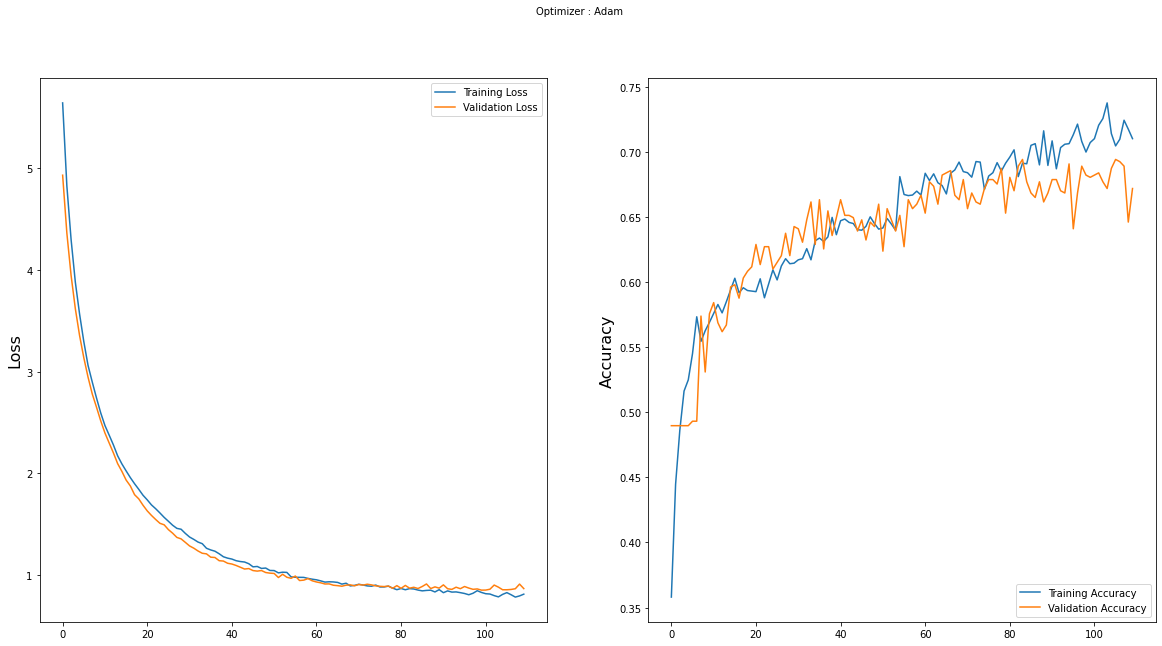

In [56]:
plotter_single(history_final_model)

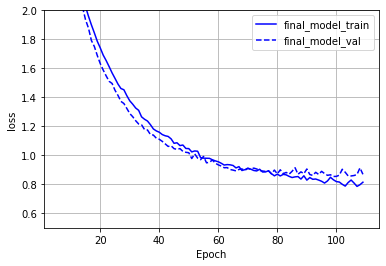

In [57]:
histories = {}

histories["final_model"] = history_final_model

plotter(histories, ylim = [0.5, 2])

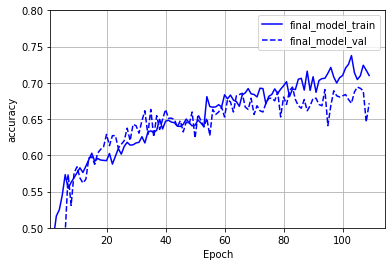

In [58]:
plotter(histories, metric="accuracy", ylim = [0.5, 0.8])

### Prediction on Unseen Data

In [94]:
getF1ScoreMicro(final_model)

'66.13%'

In [99]:
getF1ScoreMacro(final_model)

'61.75%'

In [93]:
getF1ScoreAverage(final_model)

'63.94%'

In [195]:
getPerformanceReport(final_model)

Target F1-Micro F1-Macro F1-Average
0                               All   66.13%   61.75%     63.94%
1                           Atheism   75.00%   65.35%     70.18%
2  Climate Change is a Real Concern   73.96%   46.02%     59.99%
3                 Feminist Movement   59.65%   57.01%     58.33%
4                   Hillary Clinton   63.39%   45.65%     54.52%
5          Legalization of Abortion   63.93%   58.61%     61.27%

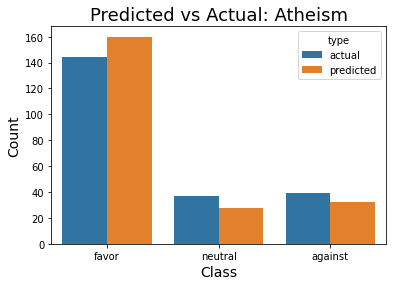

In [61]:
uniqueTarget = test_data["Target"].unique()

getPredictionBarPlot(final_model,uniqueTarget[0])

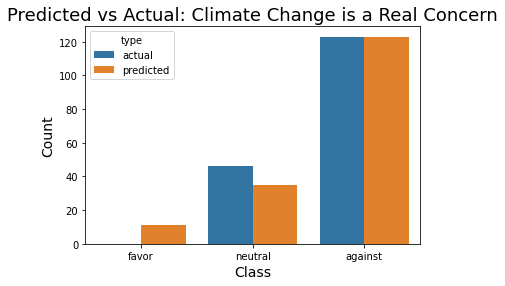

In [62]:
getPredictionBarPlot(final_model,uniqueTarget[1])

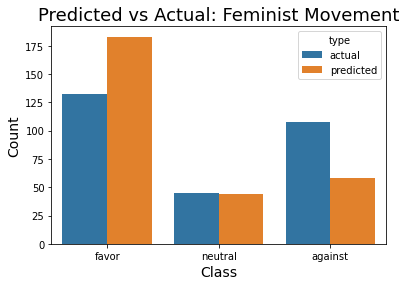

In [63]:
getPredictionBarPlot(final_model, uniqueTarget[2])

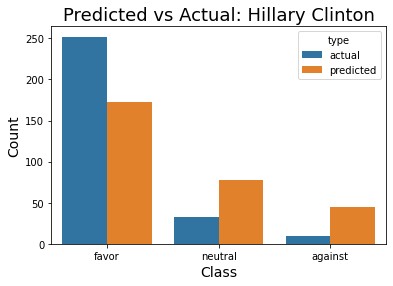

In [64]:
getPredictionBarPlot(final_model, uniqueTarget[3])

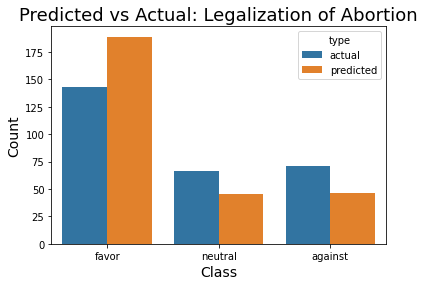

In [65]:
getPredictionBarPlot(final_model, uniqueTarget[4])

### Independant Evaluation

In [165]:
!pip install twython

In [166]:
from twython import Twython
APP_KEY = '28ZLoVRN8SE1aoA1hxU4wjgvY'
APP_SECRET = '0KmYLLmkzQy1cFmhXqTuBwCFe7YTB869qy0mdztHd85zrTleYn'

twitter = Twython(APP_KEY, APP_SECRET)
search_results = twitter.search(q="#GoHillary", rpp="40")

print(search_results)

for tweet in search_results["statuses"]:
    # print("Tweet from @%s Date: %s" % (tweet['from_user'].encode('utf-8'),tweet['created_at']))
    print(tweet['text'])

{'statuses': [{'created_at': 'Sat Oct 10 04:52:16 +0000 2020', 'id': 1314790829387472896, 'id_str': '1314790829387472896', 'text': 'How’s @HillaryClinton polling this election? Will she increase her 3 million vote win this year? \n\n@realDonaldTrump… https://t.co/NZIazYXxZJ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'HillaryClinton', 'name': 'Hillary Clinton', 'id': 1339835893, 'id_str': '1339835893', 'indices': [6, 21]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [99, 115]}], 'urls': [{'url': 'https://t.co/NZIazYXxZJ', 'expanded_url': 'https://twitter.com/i/web/status/1314790829387472896', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_

In [167]:
# Save Tweets: #prayToEnd
tweets_found = []

##########################
# Hillary Clinton: Favor
##########################

# https://twitter.com/VLHScan/status/931887685471481857
tweets_found.append({"tweet": "Hillary Clinton had to battle the GOP, FBI & Russia....AND still managed to kick your ass in the popular vote by millions.", "target": "Hillary Clinton", "stance": "Favor", "link": "https://twitter.com/VLHScan/status/931887685471481857"})

# https://twitter.com/goodtroubleme/status/1269510787552305152
tweets_found.append({"tweet": "While Hillary endangered her life by going undercover in the early 70s to expose racism in Southern schools, Bernie, a grown man was writing how women fantasize about being raped by three men. Thank God, nobody said #STFUHillary back then! #GoHillary!", "target": "Hillary Clinton", "stance": "Favor", "link": "https://twitter.com/goodtroubleme/status/1269510787552305152"})

# https://twitter.com/barbls23/status/1132373945674547200
tweets_found.append({"tweet": "#GoHillary Fighting to save our country from a wanna be Autocrat @realDonaldTrump and his lapdog Republican, who are selling out America to preserve their power! They are a disgrace to America and its people! #IWillAlwaysBeWithHillary!", "target": "Hillary Clinton", "stance": "Favor", "link": "https://twitter.com/barbls23/status/1132373945674547200"})

# https://twitter.com/TrotDarrow/status/907647225714454528
tweets_found.append({"tweet": "Good for you, #Hillary, to remind that you have the experience, the scars, etc. to speak out & that IS exactly what you must do. #GoHillary", "target": "Hillary Clinton", "stance": "Favor", "link": "https://twitter.com/TrotDarrow/status/907647225714454528"})

# https://twitter.com/FPly/status/964654963384176640
tweets_found.append({"tweet": "She should be in office right now. Why does a woman always have to come along and clean up a man's mess? And what a colossal mess this tRump has made! #GoHillary!", "target": "Hillary Clinton", "stance": "Favor", "link": "https://twitter.com/FPly/status/964654963384176640"})



####################################
# Legalization of Abortion: Against
####################################

# https://twitter.com/FPly/status/964654963384176640
tweets_found.append({"tweet": "Lord Jesus Christ, we pray for your precious, unborn babies and an end to abortion. #prolife #PrayToEndAbortion", "target": "Legalization of Abortion", "stance": "Against", "link": "https://twitter.com/roseOyuma2ndAcc/status/1312207885066145792"})

# https://twitter.com/damarispatroci/status/1313308107368472576
tweets_found.append({"tweet": "It's Monday...and that means it's time to update the number of babies saved from abortion through your prayers. Today, we know of 102 babies spared from abortion since September 23. Thanks be to God! #babysaved #praytoendabortion #40daysforlife #godisgood", "target": "Legalization of Abortion", "stance": "Against", "link": "https://twitter.com/damarispatroci/status/1313308107368472576"})

# https://twitter.com/nculturae/status/1314387731594661890
tweets_found.append({"tweet": "Proud Boys showed up at my local Planned Parenthood.  My group prayed to end abortion while theirs waved their flags and got a lot of positive attention. Really good guys. #40daysforlife #praytoendabortion", "target": "Legalization of Abortion", "stance": "Against", "link": "https://twitter.com/nculturae/status/1314387731594661890"})

# https://twitter.com/BishopStika/status/1311862408034611201
tweets_found.append({"tweet": "One should never assume anything about the private life of a person. One can however make judgements about political people who say that they are faithful Catholics and yet allow the slaughter of the most innocent. Abortion is the ultimate child abuse.", "target": "Legalization of Abortion", "stance": "Against", "link": "https://twitter.com/BishopStika/status/1311862408034611201"})

# https://twitter.com/HelpersMichigan/status/1312371331439230977
tweets_found.append({"tweet": "May God have mercy upon us and may we soon see the day this country ends the murder of infants. #PrayToEndAbortion", "target": "Legalization of Abortion", "stance": "Against", "link": "https://twitter.com/HelpersMichigan/status/1312371331439230977"})


####################################
# Legalization of Abortion: Favor
####################################

# https://twitter.com/kerrywashington/status/1314025193870774273
tweets_found.append({"tweet": "I am #prochoice. It’s my body. It’s my life. @VP You think Americans have a right to make informed decisions about their masks? I think Americans have a right to make a decision about our uteruses. #VPDebate", "target": "Legalization of Abortion", "stance": "Favor", "link": "https://twitter.com/kerrywashington/status/1314025193870774273"})

# https://twitter.com/prochoiceforal1/status/1313462177190338560
tweets_found.append({"tweet": "The same people who are against abortion are the same people who want to overturn marriage equality. Why? Because they don’t care about life, they just want to enforce their extremists religious ideals onto everyone. #prochoice #prolife", "target": "Legalization of Abortion", "stance": "Favor", "link": "https://twitter.com/prochoiceforal1/status/1313462177190338560"})

# https://twitter.com/OptixWasTaken/status/1313151934228918277
tweets_found.append({"tweet": "Pro choice aint forcing abortions on anyone; its offering safe procedures to have them if chosen. I'd rather a woman be able to have the abortion through safe manners than having to risk injury or even death to themselves because they had to go through old methods! #prochoice", "target": "Legalization of Abortion", "stance": "Favor", "link": "https://twitter.com/OptixWasTaken/status/1313151934228918277"})

# https://twitter.com/elzey_t/status/1313128445732364289
tweets_found.append({"tweet": "#ProChoice You don’t get to decide a medical procedure for women. It is completely the responsibility of her and her physician. It’s not the government or anyone else’s business.", "target": "Legalization of Abortion", "stance": "Favor", "link": "https://twitter.com/elzey_t/status/1313128445732364289"})

# https://twitter.com/CSCO303/status/1314053516915208192
tweets_found.append({"tweet": "Religious or personal beliefs on   #abortion are your own & you don’t get to dictate to the rest of us what we should believe & doesn’t have any bearing on my medical choices. Just like you can’t be forcibly sterilized. You do you leave my uterus to me #ProChoice #VoteBidenHarris", "target": "Legalization of Abortion", "stance": "Favor", "link": "https://twitter.com/CSCO303/status/1314053516915208192"})



####################################
# Atheism: Favor
####################################

# https://twitter.com/rogerlsmith/status/1036092318967844864
tweets_found.append({"tweet": "With news about the pope this week, Christianity is and always has been, simple hypocrisy.  #NoMoreReligion", "target": "Atheism", "stance": "Favor", "link": "https://twitter.com/rogerlsmith/status/1036092318967844864"})

# https://twitter.com/seanfinan8/status/866910547249418240
tweets_found.append({"tweet": "People being murdered for years over who has the better imaginery friend!! It has to stop!! #nomorereligion", "target": "Atheism", "stance": "Favor", "link": "https://twitter.com/seanfinan8/status/866910547249418240"})

# https://twitter.com/Atheist_Trooper/status/1314770190136225794
tweets_found.append({"tweet": "Religion lives off from fear and division among the people. Any logical person can clearly see this truth - but the real consequence of this is that its toxicity has spread into politics. And this truth is honestly terrifying. Keep them separated, period. #Atheist #Atheism", "target": "Atheism", "stance": "Favor", "link": "https://twitter.com/Atheist_Trooper/status/1314770190136225794"})

# https://twitter.com/NicolaMiddleton/status/1106948723844833280
tweets_found.append({"tweet": "We have to shift our focus away from religion to the spiritual mystery we are in and to becoming love. #NewFocus #NewParadigm #NoMoreReligion #SpiritualMystery #BecomingLove", "target": "Atheism", "stance": "Favor", "link": "https://twitter.com/NicolaMiddleton/status/1106948723844833280"})

# https://twitter.com/AntEyeTheist/status/1314550939508932610
tweets_found.append({"tweet": "God is about death denial. We are the only animal on earth that knows we will some day die.  It could happen at any moment and that is psychologically terrifying.  We will never be free until we recon with death, the mainspring of all human activity.  #WormAtTheCore #Atheism", "target": "Atheism", "stance": "Favor", "link": "https://twitter.com/AntEyeTheist/status/1314550939508932610"})






independant_tweets = pd.DataFrame(tweets_found)

In [168]:
independant_tweets

tweet  ...                                               link
0   Hillary Clinton had to battle the GOP, FBI & R...  ...  https://twitter.com/VLHScan/status/93188768547...
1   While Hillary endangered her life by going und...  ...  https://twitter.com/goodtroubleme/status/12695...
2   #GoHillary Fighting to save our country from a...  ...  https://twitter.com/barbls23/status/1132373945...
3   Good for you, #Hillary, to remind that you hav...  ...  https://twitter.com/TrotDarrow/status/90764722...
4   She should be in office right now. Why does a ...  ...  https://twitter.com/FPly/status/96465496338417...
5   Lord Jesus Christ, we pray for your precious, ...  ...  https://twitter.com/roseOyuma2ndAcc/status/131...
6   It's Monday...and that means it's time to upda...  ...  https://twitter.com/damarispatroci/status/1313...
7   Proud Boys showed up at my local Planned Paren...  ...  https://twitter.com/nculturae/status/131438773...
8   One should never assume anything about the pri...  ...  https://twitter.com/BishopStika/status/1311862...
9   May God have mercy upon us and may we soon see...  ...  https://twitter.com/HelpersMichigan/status/131...
10  I am #prochoice. It’s my body. It’s my life. @...  ...  https://twitter.com/kerrywashington/status/131...
11  The same people who are against abortion are t...  ...  https://twitter.com/prochoiceforal1/status/131...
12  Pro choice aint forcing abortions on anyone; i...  ...  https://twitter.com/OptixWasTaken/status/13131...
13  #ProChoice You don’t get to decide a medical p...  ...  https://twitter.com/elzey_t/status/13131284457...
14  Religious or personal beliefs on   #abortion a...  ...  https://twitter.com/CSCO303/status/13140535169...
15  With news about the pope this week, Christiani...  ...  https://twitter.com/rogerlsmith/status/1036092...
16  People being murdered for years over who has t...  ...  https://twitter.com/seanfinan8/status/86691054...
17  Religion lives off from fear and division amon...  ...  https://twitter.com/Atheist_Trooper/status/131...
18  We have to shift our focus away from religion ...  ...  https://twitter.com/NicolaMiddleton/status/110...
19  God is about death denial. We are the only ani...  ...  https://twitter.com/AntEyeTheist/status/131455...

[20 rows x 4 columns]

In [169]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from wordsegment import load, segment
load()
from autocorrect import Speller

spell = Speller(lang='en')
ind_tweets = list()
ind_target = list()
hashtag = list()



lines_tweet = independant_tweets["tweet"].values.tolist()
lines_target = independant_tweets["target"].values.tolist()

for line in lines_tweet:

    #remove puntuations  
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())

    # tokenize the text
    tokens = word_tokenize(line)

    # convert to lower case
    tokens = [w.lower() for w in tokens]

    ind_tweets.append(tokens)


for line in lines_target:
    
    tokens = word_tokenize(line)

    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    ind_target.append(tokens)

In [170]:
ind_sequences_tweets = tokenizer.texts_to_sequences(ind_tweets)
ind_sequences_target = tokenizer.texts_to_sequences(ind_target)

ind_lines_pad_tweets = pad_sequences(ind_sequences_tweets, maxlen=max_length_tweet, padding='post')
ind_lines_pad_target = pad_sequences(ind_sequences_target, maxlen=max_length_target, padding='post')


encode = {
    "Against" : 0,
    "None"  : 1,       
    "Favor" : 2
}

independant_tweets["stance"] = independant_tweets["stance"].apply(lambda x: encode[x])

In [171]:
y_pred = final_model.predict([ ind_lines_pad_tweets, ind_lines_pad_target])
    
y_pred_max = np.argmax(y_pred, axis=1)
    
str("{:.2f}".format(f1_score(independant_tweets['stance'], y_pred_max, average="micro") * 100))+"%"

'60.00%'

In [172]:
str("{:.2f}".format(f1_score(independant_tweets['stance'], y_pred_max, average="macro") * 100))+"%"

'42.05%'

In [173]:
# Average F1-Score
str("{:.2f}".format(((f1_score(independant_tweets['stance'], y_pred_max, average="macro")+f1_score(independant_tweets['stance'], y_pred_max, average="micro"))/2)* 100))+"%"

'51.02%'

In [174]:
def decode_pred(index):
  if index ==0:
    return "Against"
  elif index == 1:
    return "None"
  elif index == 2:
    return "Favor"

In [176]:
decode = {
    0: "Against",
    1: "None",       
    2: "Favor"
}

independant_tweets['stance'] = independant_tweets['stance'].apply(lambda x: decode[x])
#y_pred_max = y_pred_max.apply(lambda x: encode[x])
for index, row in independant_tweets.iterrows():
  print("Tweet: " + row['tweet'])
  print("\n")
  print("Actual: " + row['stance'])
  print("Predicted: " + decode_pred(y_pred_max[index]) )
  print("\n\n\n__________________________________\n")


Tweet: Hillary Clinton had to battle the GOP, FBI & Russia....AND still managed to kick your ass in the popular vote by millions.


Actual: Favor
Predicted: Against



__________________________________

Tweet: While Hillary endangered her life by going undercover in the early 70s to expose racism in Southern schools, Bernie, a grown man was writing how women fantasize about being raped by three men. Thank God, nobody said #STFUHillary back then! #GoHillary!


Actual: Favor
Predicted: Favor



__________________________________

Tweet: #GoHillary Fighting to save our country from a wanna be Autocrat @realDonaldTrump and his lapdog Republican, who are selling out America to preserve their power! They are a disgrace to America and its people! #IWillAlwaysBeWithHillary!


Actual: Favor
Predicted: Against



__________________________________

Tweet: Good for you, #Hillary, to remind that you have the experience, the scars, etc. to speak out & that IS exactly what you must do. #GoHillary



In [ ]:
()